In [103]:
from urllib.request import Request,urlopen,urlcleanup
from bs4 import BeautifulSoup
import pickle
import requests
from nltk.tokenize import word_tokenize
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer,FrenchStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pyLDAvis.gensim as gensimvis
from gensim import corpora, models, similarities
import pyLDAvis
import gensim
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt
from  wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt; plt.rcdefaults()
import textblob

# Web Scrapping from PageJaunes.fr

#### prendre les urls de toutes les pages

In [ ]:
url22 = "https://www.pagesjaunes.fr/annuaire/chercherlespros?quoiqui=McDonald&ou=Paris%20%2875%29&idOu=L07505600&page=1&contexte=/MEq6j7ucH9oP1WPijZj/Q%3D%3D&proximite=0&quoiQuiInterprete=McDonald"

In [ ]:
headers = requests.utils.default_headers()
headers.update({
    'User-Agent': 'Mozilla/5.0 (Linux; Android 5.1.1; SM-G928X Build/LMY47X) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.83 Mobile Safari/537.36'})

In [ ]:
urlcleanup()

In [ ]:
lll=[]
for i in range(1,2):
    if i==1:
        req = Request(url22,headers={'User-Agent': 'XYZ/3.0'}) 
    else:    
        req = Request(url22.replace("page="+str(i-1),"page="+str(i)), headers = {'User-Agent': 'XYZ/3.0'})
    response = urlopen(req)
    soup = BeautifulSoup(response, 'lxml')
    all_links=soup.find_all('a',{"class": "denomination-links pj-link"})
    for l in all_links:
        lll.append(l)

In [ ]:
len(lll)

#### prendre les avis pour chaque restaurents McDonald's

In [ ]:
avis = []
i=0
for link in lll:
        url = "https://www.pagesjaunes.fr"+link.get('href')
        req = Request(url, headers = {"User-Agent": "Mozilla/5.0"},)
        i+=1
        print(i)
        """
        i+=1
        print(i)
        urlcleanup()
        sleep(1.5)
        """
        response = urlopen(req)
        soup = BeautifulSoup(response, 'lxml')
        avs = soup.find_all('div',{"class": "commentaire"})
        for av in avs:
            avis.append(av.text)

In [ ]:
avis

In [ ]:
with open('pagesjaunes', 'wb') as fp:
    pickle.dump(avis, fp)

# Web Scrapping from Trust Pilot

In [ ]:
url_trustpilot = "https://fr.trustpilot.com/review/mcdonalds.fr"

In [ ]:
avis_final=[]
for i in range(1,8):
    if(i==1):
        req = Request(url_trustpilot, headers = {"User-Agent": "Mozilla/5.0"})
    else:
        req = Request(url_trustpilot+"?page="+str(i), headers = {"User-Agent": "Mozilla/5.0"})
    response = urlopen(req)
    soup1 = BeautifulSoup(response, 'lxml')
    avis_trustpilot=soup1.find_all('p',{'class':'review-content__text'})
    for avis in avis_trustpilot:
        avis_final.append(avis.text)

#### Enregistrer les avis dans un pickle

In [ ]:
with open('trustpilot', 'wb') as fp:
    pickle.dump(avis_final, fp)

# Web Scraping from Trip advisor

In [ ]:
url_tripadvisor = "https://www.tripadvisor.fr/Search?q=mcdonald"

In [ ]:
requ = Request(url_tripadvisor, headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36"})
response = urlopen(requ)
soup1 = BeautifulSoup(response)
links_advisor=soup1.find_all('div',{"class":"result inner-columns-wrapper"})

In [ ]:
links_advisor

In [25]:
url_advisors = ['https://www.tripadvisor.fr/Restaurant_Review-g1893587-d8042556-Reviews-or10-MacDonald_s-Saint_Pourcain_sur_Sioule_Allier_Auvergne_Rhone_Alpes.html',
               'https://www.tripadvisor.fr/Restaurant_Review-g1022647-d7351008-Reviews-Macdonald_s_Pornic_Le_Clion_sur_mer-Pornic_Loire_Atlantique_Pays_de_la_Loire.html',
               'https://www.tripadvisor.fr/Restaurant_Review-g187147-d4358263-Reviews-Macdonald_s_Max_Dormoy-Paris_Ile_de_France.html',
                'https://www.tripadvisor.fr/Restaurant_Review-g187147-d1080856-Reviews-McDonalds_Champs_Elysees-Paris_Ile_de_France.html',
                'https://www.tripadvisor.fr/Restaurant_Review-g1055982-d6869087-Reviews-McDonald_s-Rambouillet_Yvelines_Ile_de_France.html',
                'https://www.tripadvisor.fr/Restaurant_Review-g635791-d8297637-Reviews-McDonald_s-Pontarlier_Doubs_Bourgogne_Franche_Comte.html',
                'https://www.tripadvisor.fr/Restaurant_Review-g661266-d8297622-Reviews-McDonald_s-Yutz_Moselle_Grand_Est.html'
               ]

In [30]:
review_list=[]
note_list=[]
for url in url_advisors:
    r = requests.get(url)
    soup = BeautifulSoup(r.content, "lxml")
    resultsoup = soup.find_all("p", {"class" : "partial_entry"})
    notes = soup.select("span.value" , {"class" : "ui_bubble_rating bubble_10"})    
    #save the reviews to a test text file locally
    for review in resultsoup:
        review_list.append(review.get_text())
        note_list.append(notes)

In [31]:
note_list[0]

[]

In [ ]:
with open('tripadvisor', 'wb') as fp:
    pickle.dump(review_list, fp)

# Scraping from custplace

In [ ]:
url = "https://fr.custplace.com/macdo-mcdonalds"

In [ ]:
lll=[]
for i in range(1,10):
    if i==1:
        req = Request(url, headers = {"User-Agent": "Mozilla/5.0"}) 
    else:    
        #req = Request(url.replace("page=1","page="+str(i)), headers = {"User-Agent": "Mozilla/5.0"})
        req = Request(url+"?page="+str(i), headers = {"User-Agent": "Mozilla/5.0"})
    response = urlopen(req)
    soup = BeautifulSoup(response, 'lxml')
    all_links=soup.find_all('div',{"class": "topic-content"})
    for l in all_links:
        lll.append(l.find_all('p'))
        lll.append(l.find_all('div',{"class": "topic-answer-content"}))

In [ ]:
avis=[]
for l in lll:
    for j in range(len(l)):
        txt=str(l[j]).replace("<p>"," ")
        txt=txt.replace("<br/>"," ")
        txt=txt.replace("\r"," ")
        txt=txt.replace("\n"," ")
        txt=txt.replace("</p>"," ")
        txt=txt.replace("</p>"," ")
        txt=txt.replace("</div>"," ")
        txt=txt.replace('<div class="topic-answer-content">'," ")

        avis.append(txt)

In [ ]:
with open('custplace', 'wb') as fp:
    pickle.dump(avis, fp)

In [ ]:
avis=[]
for l in lll:
    for j in range(len(l)):
        txt=str(l[j]).replace("<p>"," ")
        txt=txt.replace("<br/>"," ")
        txt=txt.replace("\r"," ")
        txt=txt.replace("\n"," ")
        txt=txt.replace("</p>"," ")
        txt=txt.replace("</p>"," ")
        txt=txt.replace("</div>"," ")
        txt=txt.replace('<div class="topic-answer-content">'," ")
        
        avis.append(txt)

# Rassembler tous les avis dans une seule list

In [ ]:
with open ('trustpilot', 'rb') as fp:
    itemlist1 = pickle.load(fp)

In [20]:
with open ('dfPagesJaunes', 'rb') as fp:
    itemlist2 = pickle.load(fp)
itemlist2

,avis,lieu,note
0,\nBien placé pour manger avant un salon comme ...,pl Porte de Versailles,5
1,\nquel stresse et quelle lenteur... je compren...,Forum des Halles,2
2,"\nPire mcdo du monde! Endroit très sale, perso...",Forum des Halles,1
3,\nA côté de la gare. Il y a toujours beaucoup ...,r Saint Lazare,4
4,"\nBien placé dans paris, face à la gare st laz...",r Saint Lazare,3
...,...,...,...
321,\nAccueil excellent mais attente excessive 18 ...,r Renard,3
322,\nBien\nmacdonald très propre bien place perso...,r Renard,4
323,\nPetit MacDonald sympa DAns Paris. Il y a un ...,r Renard,4
324,\nHorrible nul nul nul\nle pire mc do de FRANC...,r Faubourg du Temple,1


In [11]:
notes=pd.to_numeric(itemlist2["note"])

In [15]:
itemlist2["note"].describe()

count    326.000000
mean       3.444785
std        1.388420
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: note, dtype: float64

In [ ]:
with open ('tripadvisor', 'rb') as fp:
    itemlist3 = pickle.load(fp)

In [ ]:
with open ('custplace', 'rb') as fp:
    itemlist4 = pickle.load(fp)

In [ ]:
avis_final=[]
for i in range(len(itemlist1)):
    avis_final.append(itemlist1[i])

In [ ]:
for i in range(len(itemlist2)):
    avis_final.append(itemlist2[i])

In [ ]:
for i in range(len(itemlist3)):
    avis_final.append(itemlist3[i])

In [ ]:
for i in range(len(itemlist4)):
    avis_final.append(itemlist4[i])

In [ ]:
avis_final_1=[]
i=0
for avis in avis_final:
    if avis is not None:
        avis_final_1.append(avis)

In [ ]:
len(avis_final_1)

# 2-Prétraiter des données

In [2]:
with open ('dfFinal.jpg', 'rb') as fp:
    df = pickle.load(fp)

In [3]:
with open ('custplace.jpg', 'rb') as fp:
    cust = pickle.load(fp)

In [4]:
len(cust)

246

In [5]:
cust_etoile = pd.read_csv("avis.csv")

In [6]:
cust_etoile = cust_etoile.iloc[:,1]

In [7]:
df5 = pd.DataFrame(columns=["avis","note"])

In [8]:
df5["avis"]=cust
df5["note"]= cust_etoile

In [9]:
variable_aad=[df,df5]

In [10]:
df_final = pd.concat(variable_aad)

In [11]:
df_final.index=range(1262)

In [111]:
with open('df_final', 'wb') as fp:
    pickle.dump(df_final, fp)

In [13]:
avis_final_letters = []
for avis in df_final["avis"]:
    avis_final_letters.append(re.sub("[^a-zA-Z]", " ", avis))

## Tokenisation

In [14]:
tokenized_docs = [word_tokenize(doc) for doc in avis_final_letters]

## Transformer les mots en minuscules

In [15]:
miniscules = []
for word in tokenized_docs:
    m = []
    for w in word:
        m.append(w.lower())
    miniscules.append(m)

## Enlever les stopwords

In [16]:
tokenized_docs_no_stopwords = []
for doc in miniscules:
    new_term_vector = []
    for word in doc:
        if not word in stopwords.words('french'):
            new_term_vector.append(word)
    
    tokenized_docs_no_stopwords.append(new_term_vector)

In [37]:
stopwords.words('french');

## Appliquer la lemmatisation et le stemming

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\SL-
[nltk_data]     WASSIM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
snowball = FrenchStemmer()
wordnet = WordNetLemmatizer()
def lemmatize_stemming(text):
    return snowball.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
preprocessed_docs = []

for doc in tokenized_docs_no_stopwords:
    final_doc = []
    for word in doc:
        final_doc.append(lemmatize_stemming(word))
    
    preprocessed_docs.append(final_doc)

In [20]:
df_final["avis"]=preprocessed_docs

In [21]:
comment=""
for i in range(len(df_final)):
    for j in df_final['avis'][i]:
        comment+=" "+j

In [67]:
comment.count("bon")

321

In [24]:
stopwordss = set(STOPWORDS) 

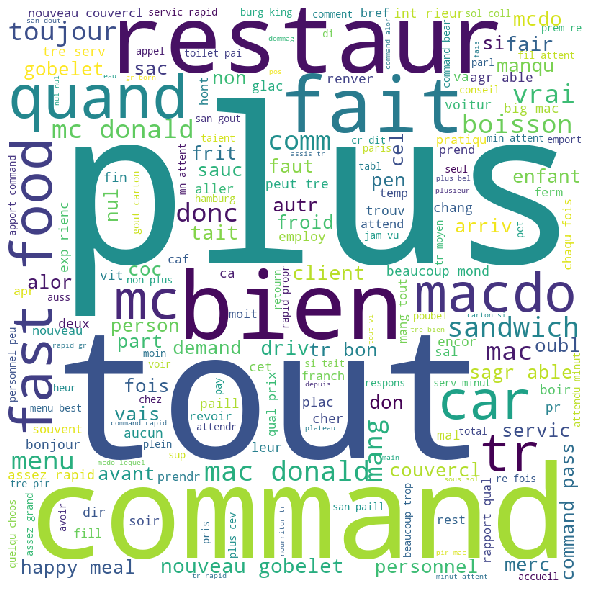

In [26]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwordss, 
                min_font_size = 10).generate(comment) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Les nuages ​​de mots représentés par ce word cloud sont des représentations graphiques de la fréquence des mots qui donnent une plus grande importance aux mots qui apparaissent plus fréquemment dans les avis collectés relatifs à Macdo France. Plus le mot est grand dans le visuel, plus le mot est courant dans les avis des clients tout comme BIEN, COMMANDE,FROID.. Celà peut nous aider à éffectuer une analyse textuelle exploratoire par rapport à notre objectif métier l'e réputation de Macdo France. En identifiant les mots qui apparaissent fréquemment dans les commentaires des clients on peut relever les points ou thèmes les plus saillants à notre objectif métier principal :
- l'image associée à macdo :
* qualité de service offert par MACDO : 
Mots associés à l'image positifs de Macdo: bien,service rapide,nouveau , happy meal, assez grand, assez rapide
Mots associés à l'image négatifs de Macdo: Commande Froide,cher, manque, nul , peu, catastrophe, poubelle  ..
* l'image relative à macdo est associé aux jeunes, enfants : fastfood, enfants
* l'image relative à macdo est associé à un endroit de divertissement : soir , happy

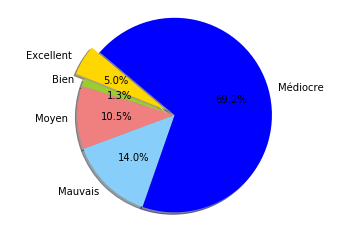

In [27]:
# Data to plot
labels = 'Excellent ', 'Bien', 'Moyen', 'Mauvais','Médiocre'
sizes = [len(df_final[df_final['note']==5]), len(df_final[df_final['note']==4]), len(df_final[df_final['note']==3]), len(df_final[df_final['note']==2]),len(df_final[df_final['note']==1])]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Dans la figure ci dessus nous avons choisi de réaliser
un diagramme circulaire
 dans lequel nous avons caluculé la fréquence 
de l'apparition des mots: Mediocre, Mauvais, Moyen, Bien 
et Excellent dans les commentaires sur Macdo France 
et qui vont nous aider à connaitre l'e-reputation de Macdo,
Evaluer la qualité de ses services.
A partir de cette figure, on peut remarquer que la fréquencele mot
du mot Mediocre est 69.2% alors 69.2% des gens
jugent que les services offerts par Macdo sont Médiocres
14% la fréquence de l'apparition du mot Mauvais, contre 1.3% 
pour le mot Bien 
ce qui peut nous guider vers une unique conclusion:
Une e-réputation et une qualité de service Médiocre dans 
la plupart du temps.

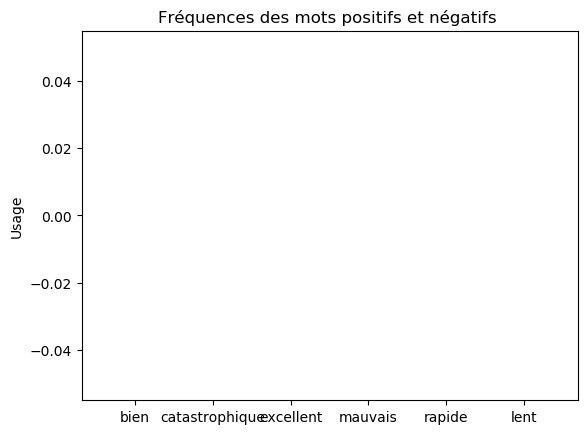

In [113]:
objects = ('bien', 'catastrophique', 'excellent', 'mauvais', 'rapide', 'lent')
performance = [comment.count('bien'),comment.count('catastroph'),comment.count('excellent'),
               comment.count('mauv'),comment.count('rapid'),comment.count('lent')]
colors = ("green","red","green","red","green","red")
plt.bar(objects, performance, align='center', alpha=0.5,color=colors)
plt.ylabel('Usage')
plt.title('Fréquences des mots positifs et négatifs ')

plt.show()

En utilisant l'histogramme réalisé ci-dessus, et tout en s'intéressant à nos objectifs métiers (l'e réputation de Macdo, la qualité du service offert par Macdo..) on a pu représenter la fréquence des mots positives (colorés en vert : bien, rapide, excellent)
et la fréquence des mots négatives (colorés en rouge : catastrophique, mauvais, lent) associés à l'image de Macdo France. 
On peut constater que la fréquence des mots positifs est plus grande que celle des mots négatifs, sauf que à ce stade on ne peut pas vraiment interpréter cette fréquence car on peut trouver des termes positive dans une phrase négative, ce qui va permettre de fausser nos analyses.
Afin de réaliser des interprétations dans un sens fiable, il faut avoir recours à l'analyse d'opinion dans la partie suivante.

## Créer le dictionnaire contenant la frequence de chaque mot

In [28]:
dictionary = gensim.corpora.Dictionary(preprocessed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 a
1 assoir
2 avant
3 bien
4 comm
5 gam
6 mang
7 paris
8 plac
9 presqu
10 salon


# Filtrer les tokens qui apparaissent dans:
###### • Moins de 15 documents (nombre absolu),
###### • Ne garder que les 100 000 premiers tokens les plus fréquents.

In [29]:
dictionary.filter_extremes(no_below=15, keep_n=100000)

#### Pour chaque document, créer un dictionnaire indiquant combien de mots et combien de fois ces mots apparaissent.

In [30]:
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]

In [86]:
bow_corpus;

#### TF-IDF : créer un modèle TF-IDF

In [32]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [88]:
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.11137310973064979),
 (1, 0.3600017257456008),
 (2, 0.4146930272840218),
 (3, 0.2848271926248326),
 (4, 0.25028801933105205),
 (5, 0.385726799480195),
 (6, 0.30653883887629724),
 (7, 0.4680081505390736),
 (8, 0.2836741196938059)]


#### Appliquer LDA en utilisant bow corpus

In [34]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [35]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.038*"a" + 0.034*"command" + 0.023*"r" + 0.017*"mac" + 0.017*"do" + 0.015*"tr" + 0.013*"e" + 0.012*"tout" + 0.011*"plus" + 0.011*"pass"
Topic: 1 
Words: 0.038*"e" + 0.021*"tout" + 0.020*"froid" + 0.017*"a" + 0.017*"plus" + 0.017*"san" + 0.015*"carton" + 0.015*"car" + 0.014*"tre" + 0.014*"tait"
Topic: 2 
Words: 0.024*"nouveau" + 0.021*"command" + 0.020*"a" + 0.019*"mcdonald" + 0.019*"menu" + 0.017*"froid" + 0.017*"prix" + 0.016*"couvercl" + 0.016*"best" + 0.016*"of"
Topic: 3 
Words: 0.079*"a" + 0.018*"bon" + 0.017*"plus" + 0.017*"attent" + 0.015*"command" + 0.014*"mc" + 0.012*"toujour" + 0.012*"beaucoup" + 0.011*"tre" + 0.011*"rapid"
Topic: 4 
Words: 0.030*"command" + 0.025*"tre" + 0.023*"tr" + 0.020*"a" + 0.018*"mond" + 0.017*"plus" + 0.016*"do" + 0.016*"toilet" + 0.015*"e" + 0.013*"demand"
Topic: 5 
Words: 0.038*"gobelet" + 0.031*"plus" + 0.029*"nouveau" + 0.028*"a" + 0.028*"tout" + 0.023*"vrai" + 0.022*"mc" + 0.021*"couvercl" + 0.012*"tr" + 0.012*"mang"
Topic: 6 
Wo

cet Output représente la déduction de 10 sujets à partir des commentaire de la clientéle de McDonald'ss France qu'on les a déja extraits à partir des sites web afin de pouvoir connaître l'e-réputation de mcdonalds france,determiner la qualité du service et détecter les imperfections (nos objectifs métiers)

D'après la sortie du modèle, on peut analyser les avis des utilisateurs relatifs à Macdo France.En effet, On peut remarquer à partir des topics, par exemple que les
mots positifs contenus dans ces données comme assez, rapide, grand ont des poids élevées ce qui indique la bonne qualité du service 
offert par Macdo France. Il faut pas ignorer la présence des mots négatives comme peu qui ont de faibles poids. L'analyse d'opinion et de sentiments aura lieu dans la partie qui suive pour confirmer ce résultat obtenu.

#### Appliquer LDA en utilisant TF-IDF

In [84]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.031*"propr" + 0.016*"gobelet" + 0.014*"servic" + 0.014*"nouveau" + 0.014*"tre" + 0.013*"produit" + 0.013*"bien" + 0.011*"rapid" + 0.011*"hallucin" + 0.011*"froid"
Topic: 1 Word: 0.025*"sall" + 0.020*"beaucoup" + 0.015*"mond" + 0.013*"attendu" + 0.013*"surtout" + 0.012*"minut" + 0.012*"sagr" + 0.012*"a" + 0.012*"command" + 0.011*"demand"
Topic: 2 Word: 0.013*"driv" + 0.011*"nouveau" + 0.009*"a" + 0.009*"plus" + 0.009*"menu" + 0.009*"couvercl" + 0.009*"tout" + 0.009*"mac" + 0.008*"aller" + 0.008*"tr"
Topic: 3 Word: 0.014*"command" + 0.014*"bear" + 0.010*"fast" + 0.010*"food" + 0.009*"tr" + 0.009*"servic" + 0.009*"nez" + 0.009*"femm" + 0.009*"toujour" + 0.009*"a"
Topic: 4 Word: 0.011*"a" + 0.010*"plus" + 0.010*"jam" + 0.009*"r" + 0.009*"macdonald" + 0.009*"attent" + 0.009*"car" + 0.009*"mac" + 0.008*"do" + 0.008*"pir"
Topic: 5 Word: 0.020*"visit" + 0.020*"janvi" + 0.018*"ver" + 0.014*"h" + 0.012*"a" + 0.011*"accueil" + 0.010*"mang" + 0.010*"propos" + 0.010*"mc" + 0.010*"s

##### Evaluation du model sur bow corpus

In [89]:
for index, score in sorted(lda_model[bow_corpus[98]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.5499330163002014	 
Topic: 0.030*"command" + 0.025*"tre" + 0.023*"tr" + 0.020*"a" + 0.018*"mond" + 0.017*"plus" + 0.016*"do" + 0.016*"toilet" + 0.015*"e" + 0.013*"demand"

Score: 0.0500386506319046	 
Topic: 0.062*"assez" + 0.046*"rapid" + 0.021*"command" + 0.021*"grand" + 0.019*"pai" + 0.019*"servic" + 0.018*"temp" + 0.018*"mcdonald" + 0.017*"lieu" + 0.017*"peu"

Score: 0.05000672489404678	 
Topic: 0.038*"a" + 0.034*"command" + 0.023*"r" + 0.017*"mac" + 0.017*"do" + 0.015*"tr" + 0.013*"e" + 0.012*"tout" + 0.011*"plus" + 0.011*"pass"

Score: 0.05000537633895874	 
Topic: 0.030*"bon" + 0.022*"a" + 0.021*"food" + 0.021*"tr" + 0.021*"fast" + 0.017*"tout" + 0.017*"mac" + 0.016*"bien" + 0.015*"plus" + 0.014*"servic"

Score: 0.050004519522190094	 
Topic: 0.024*"nouveau" + 0.021*"command" + 0.020*"a" + 0.019*"mcdonald" + 0.019*"menu" + 0.017*"froid" + 0.017*"prix" + 0.016*"couvercl" + 0.016*"best" + 0.016*"of"

Score: 0.050004370510578156	 
Topic: 0.079*"a" + 0.018*"bon" + 0.017*"plus"

##### Evaluation du model sur TF-IDF

In [90]:
for index, score in sorted(lda_model_tfidf[bow_corpus[98]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5499879121780396	 
Topic: 0.025*"sall" + 0.020*"beaucoup" + 0.015*"mond" + 0.013*"attendu" + 0.013*"surtout" + 0.012*"minut" + 0.012*"sagr" + 0.012*"a" + 0.012*"command" + 0.011*"demand"

Score: 0.05000421404838562	 
Topic: 0.011*"a" + 0.010*"plus" + 0.010*"jam" + 0.009*"r" + 0.009*"macdonald" + 0.009*"attent" + 0.009*"car" + 0.009*"mac" + 0.008*"do" + 0.008*"pir"

Score: 0.05000316724181175	 
Topic: 0.015*"vi" + 0.014*"plus" + 0.014*"lequel" + 0.014*"cev" + 0.013*"mang" + 0.012*"mcdo" + 0.012*"tr" + 0.010*"a" + 0.009*"tout" + 0.008*"pr"

Score: 0.05000123009085655	 
Topic: 0.021*"assez" + 0.021*"bon" + 0.017*"rapid" + 0.013*"temp" + 0.013*"command" + 0.013*"tr" + 0.012*"bien" + 0.012*"tabl" + 0.011*"do" + 0.011*"mac"

Score: 0.05000105872750282	 
Topic: 0.013*"exp" + 0.013*"rienc" + 0.011*"champ" + 0.010*"plus" + 0.010*"gastronom" + 0.010*"perfect" + 0.010*"elyse" + 0.010*"licieux" + 0.010*"rapport" + 0.009*"nugget"

Score: 0.05000071972608566	 
Topic: 0.031*"propr" + 0.016*

#### Tester le model sur un nouveau commentaire

In [91]:
unseen_document = "les tables sont sales service est mal et en retard"
comment = re.sub("[^a-zA-Z]", " ", unseen_document)
    
tokenized_docs = word_tokenize(comment) 
miniscules = []
for word in tokenized_docs:
    miniscules.append(word.lower())
    
tokenized_docs_no_stopwords = []
for doc in miniscules:
    if not doc in stopwords.words('french'):
        tokenized_docs_no_stopwords.append(word)
    


snowball = SnowballStemmer('french')
wordnet = WordNetLemmatizer()
def lemmatize_stemming(text):
    return snowball.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
preprocessed_docs = []

for doc in tokenized_docs_no_stopwords:
    final_doc = []
    preprocessed_docs.append(lemmatize_stemming(word))


In [92]:

bow_vector = dictionary.doc2bow(preprocessed_docs)
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.10000000149011612	 Topic: 0.038*"a" + 0.034*"command" + 0.023*"r" + 0.017*"mac" + 0.017*"do"
Score: 0.10000000149011612	 Topic: 0.038*"e" + 0.021*"tout" + 0.020*"froid" + 0.017*"a" + 0.017*"plus"
Score: 0.10000000149011612	 Topic: 0.024*"nouveau" + 0.021*"command" + 0.020*"a" + 0.019*"mcdonald" + 0.019*"menu"
Score: 0.10000000149011612	 Topic: 0.079*"a" + 0.018*"bon" + 0.017*"plus" + 0.017*"attent" + 0.015*"command"
Score: 0.10000000149011612	 Topic: 0.030*"command" + 0.025*"tre" + 0.023*"tr" + 0.020*"a" + 0.018*"mond"
Score: 0.10000000149011612	 Topic: 0.038*"gobelet" + 0.031*"plus" + 0.029*"nouveau" + 0.028*"a" + 0.028*"tout"
Score: 0.10000000149011612	 Topic: 0.036*"plus" + 0.022*"mac" + 0.019*"fois" + 0.015*"paill" + 0.013*"voitur"
Score: 0.10000000149011612	 Topic: 0.030*"bon" + 0.022*"a" + 0.021*"food" + 0.021*"tr" + 0.021*"fast"
Score: 0.10000000149011612	 Topic: 0.062*"assez" + 0.046*"rapid" + 0.021*"command" + 0.021*"grand" + 0.019*"pai"
Score: 0.10000000149011612	 To

## Visualisation des topics

In [93]:
vis_data = gensimvis.prepare(lda_model, bow_corpus, dictionary,sort_topics=False)

pyLDAvis.display(vis_data)

C:\Users\SL-WASSIM\Anaconda3\envs\PythonGPU\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


### Analyse d'opinion 

In [101]:
analyse=[]
for i in range(len(df_final)):
    c=""
    for j in df_final['avis'][i]:
        c+=" "+j
    analyse.append(c)

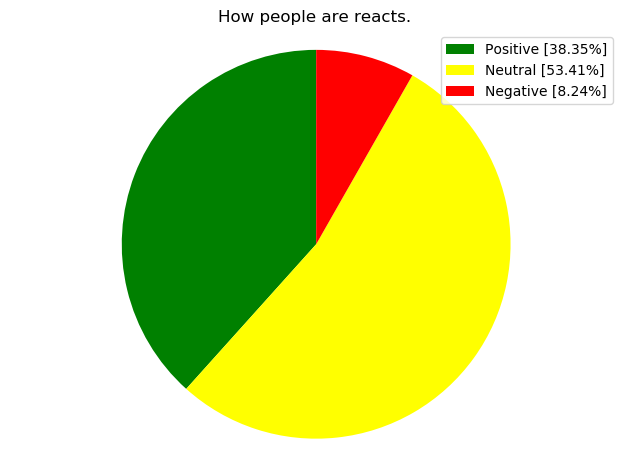

In [114]:
positive = 0
negative = 0
neutral = 0
polarity = 0

def calculatePercentage(a,b):
    return 100*float(a)/float(b)

for tweet in analyse:
    myAnalysis=textblob.TextBlob(tweet)
    polarity += myAnalysis.sentiment.polarity
    if myAnalysis.sentiment.polarity ==0:
        neutral+=1
    elif myAnalysis.sentiment.polarity > 0.00:
        positive+=1
    elif myAnalysis.sentiment.polarity < 0.00:
        negative+=1

positive=calculatePercentage(positive,len(analyse))
negative=calculatePercentage(negative,len(analyse))
neutral=calculatePercentage(neutral,len(analyse))

positive=format(positive,'.2f')
negative=format(negative,'.2f')
neutral=format(neutral,'.2f')

labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]']
sizes=[positive,neutral,negative]
colors=['green','yellow','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title('How people are reacts.')
plt.axis('equal')
plt.tight_layout()
plt.show()